In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [0]:
N = 10000
beta = 5.0/4.0        # R_0 / gamma
D = 4.0               # infections lasts four days
gamma = 1.0 / D
alpha = 0.2           # 10% death rate
rho = 1.0/9.0             # 9 days from infection until death
epselon = 0.5
delta = 1.0 / 5.0     # incubation period of five days
S0, E0, I0 , R0, D0, C0= N-2, 1, 0, 0,0, 1 

In [0]:
def model(Y,t,N, beta,gamma, alpha, epselon):
    S, E,I, R, D, C= Y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta*E*epselon - (1-alpha) * gamma * I - alpha * rho * I - alpha * rho * C - (1-alpha) * gamma *C 
    dRdt = gamma * I* (1-alpha) + (1-alpha)* gamma *C
    dDdt = alpha* rho *I + alpha * rho * C
    dCdt = (1-epselon)*E- (1-alpha) * gamma * I - (1-alpha)* gamma *C - alpha * rho * I - alpha * rho * C
    return dSdt,dEdt, dIdt, dRdt, dDdt, dCdt

In [0]:
t = np.linspace(0,100, 100)
y0 = S0,E0, I0, R0,D0, C0

In [0]:
y = odeint(model,y0,t, args=(N, beta, gamma,  alpha, epselon))

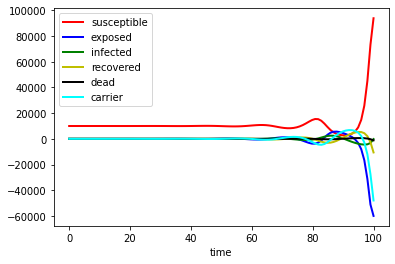

In [57]:
S, E,I, R,D,C = y.T
plt.plot(t,S,'r-',linewidth=2,label='susceptible')
plt.plot(t, E,'b-',linewidth=2,label='exposed')
plt.plot(t,I,'g-',linewidth=2,label='infected')
plt.plot(t,R,'y-',linewidth=2,label='recovered')
plt.plot(t,D,'black',linewidth=2,label='dead')
plt.plot(t,C,'cyan',linewidth=2,label='carrier')
plt.xlabel('time')
plt.legend()
plt.show()